## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!C:\"Program Files"\"NVIDIA Corporation"\NVSMI\nvidia-smi.exe

Sun Jul 14 23:59:48 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.86       Driver Version: 430.86       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 105... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   40C    P8    N/A /  N/A |     75MiB /  4096MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
from sklearn import preprocessing

In [5]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x):
    x = x.reshape((len(x),-1))
    max_abs_scaler= preprocessing.MaxAbsScaler()
    x = max_abs_scaler.fit_transform(x)
    return x 

def preproc_y(y, num_classes = 10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [12]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [13]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [14]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 112us/step - loss: 1.9768 - acc: 0.2710 - val_loss: 1.8525 - val_acc: 0.3413
Epoch 2/100
50000/50000 [==============================] - 3s 66us/step - loss: 1.7683 - acc: 0.3609 - val_loss: 1.7413 - val_acc: 0.3681
Epoch 3/100
50000/50000 [==============================] - 3s 66us/step - loss: 1.6694 - acc: 0.3973 - val_loss: 1.6346 - val_acc: 0.4017
Epoch 4/100
50000/50000 [==============================] - 3s 66us/step - loss: 1.5908 - acc: 0.4314 - val_loss: 1.5412 - val_acc: 0.4546
Epoch 5/100
50000/50000 [==============================] - 3s 65us/step - loss: 1.5450 - acc: 0.4483 - val_loss: 1.5639 - val_acc: 0.4481
Epoch 6/100
50000/50000 [==============================] - 3s 63us/step - loss: 1.4983 - acc: 0.4650 - val_loss: 1.5311 - val_acc: 0.4563
Epoch 7/100
50000/50000 [==============================] - 3s 64us/step - loss: 1.4624 - acc: 0.4783 - val_loss: 1.4457 -

50000/50000 [==============================] - 3s 63us/step - loss: 0.5583 - acc: 0.8005 - val_loss: 2.0797 - val_acc: 0.5069
Epoch 60/100
50000/50000 [==============================] - 3s 63us/step - loss: 0.5787 - acc: 0.7911 - val_loss: 2.0296 - val_acc: 0.5064
Epoch 61/100
50000/50000 [==============================] - 3s 63us/step - loss: 0.5351 - acc: 0.8070 - val_loss: 2.0380 - val_acc: 0.5095
Epoch 62/100
50000/50000 [==============================] - 3s 63us/step - loss: 0.5318 - acc: 0.8082 - val_loss: 2.2309 - val_acc: 0.5043
Epoch 63/100
50000/50000 [==============================] - 3s 63us/step - loss: 0.5275 - acc: 0.8103 - val_loss: 2.1427 - val_acc: 0.5113
Epoch 64/100
50000/50000 [==============================] - 3s 64us/step - loss: 0.5012 - acc: 0.8214 - val_loss: 2.1921 - val_acc: 0.5096
Epoch 65/100
50000/50000 [==============================] - 3s 63us/step - loss: 0.5079 - acc: 0.8166 - val_loss: 2.2313 - val_acc: 0.5076
Epoch 66/100
50000/50000 [==============

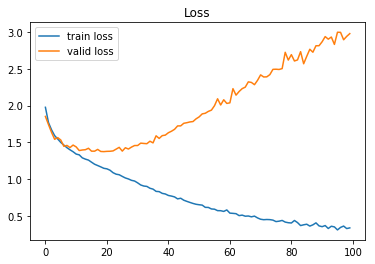

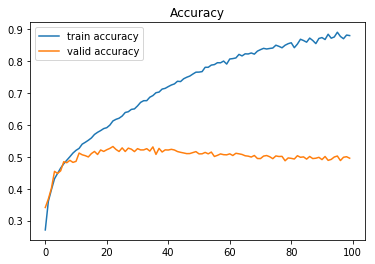

In [16]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()